In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [11]:
 
def get_phase(val_comp):
        out = np.mod(np.angle(val_comp) , 2 * np.pi)
        out[out>np.pi] = out[out>np.pi]-2 * np.pi
        out=out*180/np.pi
        return(out)

  #Identify complex conjugate pairs and retain only those with positive
  #frequency

def identify_complex_conjugates(eig11,eig12,eig13,eig14,vec11,vec12,vec13,vec14):
  eigpair1 = np.zeros(n , dtype = complex)
  eigpair2 = np.zeros(n , dtype = complex)
  vecpair1 = np.zeros((n , 2) , dtype = complex)
  vecpair2 = np.zeros((n , 2) , dtype = complex)
  tol = 1e-12
  
  for i in range(n):
      if np.abs(np.conj(eig11[i])-eig12[i]) < tol :
          if np.imag(eig11[i])>0:
              eigpair1[i] = eig11[i]
              vecpair1[i] = [vec11[i , 0] , vec11[i , 1]]
          else:
              eigpair1[i] = eig12[i]
              vecpair1[i] = [vec12[i , 0] , vec12[i , 1]]
      if np.abs(np.conj(eig11[i])-eig13[i]) < tol :
          if np.imag(eig11[i])>0:
              eigpair1[i] = eig11[i]
              vecpair1[i] = [vec11[i , 0] , vec11[i , 1]]
          else:
              eigpair1[i] = eig13[i]
              vecpair1[i] = [vec13[i , 0] , vec13[i , 1]]
      if np.abs(np.conj(eig11[i])-eig14[i]) < tol :
          if np.imag(eig11[i])>0:
              eigpair1[i] = eig11[i]
              vecpair1[i] = [vec11[i , 0] , vec11[i , 1]]
          else:
              eigpair1[i] = eig14[i]
              vecpair1[i] = [vec14[i , 0] , vec14[i , 1]]
              
      if np.abs(np.conj(eig12[i])-eig13[i]) < tol :
          if np.imag(eig12[i])>0:
              eigpair2[i] = eig12[i]
              vecpair2[i] = [vec12[i , 0] , vec12[i , 1]]
          else:
              eigpair2[i] = eig13[i]
              vecpair2[i] = [vec13[i , 0] , vec13[i , 1]]
      if np.abs(np.conj(eig12[i])-eig14[i]) < tol :
          if np.imag(eig12[i])>0:
              eigpair2[i] = eig12[i]
              vecpair2[i] = [vec12[i , 0] , vec12[i , 1]]
          else:
              eigpair2[i] = eig14[i]
              vecpair2[i] = [vec14[i , 0] , vec14[i , 1]]
      if np.abs(np.conj(eig13[i])-eig14[i]) < tol :
          if np.imag(eig13[i])>0:
              eigpair2[i] = eig13[i]
              vecpair2[i] = [vec13[i , 0] , vec13[i , 1]]
          else:
              eigpair2[i] = eig14[i]
              vecpair2[i] = [vec14[i , 0] , vec14[i , 1]]
  return(eigpair1,eigpair2,vecpair1,vecpair2)

def sort_eigenvectors(eigpair1,eigpair2,vecpair1,vecpair2):    
    new_eigpair1 = np.zeros(n , dtype = complex)
    new_eigpair2 = np.zeros(n , dtype = complex)
    new_vecpair1 = np.zeros((n , 2) , dtype = complex)
    new_vecpair2 = np.zeros((n , 2) , dtype = complex)
    new_eigpair1[0] = eigpair2[0]
    new_eigpair2[0] = eigpair1[0]
    new_vecpair1[0 , :] = vecpair2[0 , :]
    new_vecpair2[0 , :] = vecpair1[0 , :]
    for i in range(1 , n , 1):
        dis1 = vecpair1[i , 1]-new_vecpair1[i-1 , 1]
        dis2 = vecpair2[i , 1]-new_vecpair1[i-1 , 1]
        if np.abs(dis2) < np.abs(dis1):
            new_eigpair1[i] = eigpair2[i]
            new_eigpair2[i] = eigpair1[i]
            new_vecpair1[i , :] = vecpair2[i , :]
            new_vecpair2[i , :] = vecpair1[i , :]
        else:
            new_eigpair1[i] = eigpair1[i]
            new_eigpair2[i] = eigpair2[i]
            new_vecpair1[i , :] = vecpair1[i , :]
            new_vecpair2[i , :] = vecpair2[i , :]
    return(new_eigpair1,new_eigpair2,new_vecpair1,new_vecpair2)




In [12]:
#=============== MAIN BODY ==================================================

# -- User definitions -------------------------------------------------------
# Define model parameters (Values from Hodges P.186)
# b = 0.5     #Semi-chord
# e = -0.1    #Distance centre of mass [-] (fraction semi-chord)
# a = -0.2    #Distance torsional axis [-] (fraction semi-chord)
# mu = 20*np.pi     #Mass ratio [-]
# sigma = 0.4 #Frequency ratio [-]
# r2 = 6/25   #Dimensionless radius of Gyration

b = 0.5     #Semi-chord
e =  -0.1    #Distance centre of mass [-] (fraction semi-chord)
a =  -0.2    #Distance torsional axis [-] (fraction semi-chord)
mu = 20     #Mass ratio [-]
sigma = 0.4 #Frequency ratio [-]
r2 = 0.25   #Dimensionless radius of Gyration squared r2 = IC/(mb^2)+(e-a)^2

# With mu=m/(rho*b^2), rho=1, b2=0.25 => m= 15kg
# With r2=IC/(mb^2)+(e-a) => IC=0.7875


w_t = 100           #Twist frequency [Hz]. Used for definition of reduced velocity & normalization. 
dCLdt = 6.283185    #Lift curve slope , 2pi

n = 100                                #Number of discrete reduced velocities to evaluate 
maxvel=2.5
v_red = np.linspace(0.01, maxvel , n)  #Reduced velocity range
#----------------------------------------------------------------------------

# Derived parameters & array initialisation
d = (e-a)           #Offset between centre of mass and torsional axis
d2 = d * d
vel = v_red*w_t*b   #Dimensional velocity

eig1 = np.zeros(n , dtype = complex)
eig2 = np.zeros(n , dtype = complex)
eig3 = np.zeros(n , dtype = complex)
eig4 = np.zeros(n , dtype = complex)
vec1 = np.zeros((n , 4) , dtype = complex)
vec2 = np.zeros((n , 4) , dtype = complex)
vec3 = np.zeros((n , 4) , dtype = complex)
vec4 = np.zeros((n , 4) , dtype = complex)

#Loop over velocities
for i in range(n):    
   
    #Assemble mass matrix
    M_hh = 1
    M_ht = d
    M_th = d
    M_tt = r2
    
    M = np.zeros((2 , 2) , dtype = complex)
    M[0 , 0] = M_hh
    M[0 , 1] = M_ht
    M[1 , 0] = M_th
    M[1 , 1] = M_tt
    
    #Assemble stiffness matrix
    K = np.zeros((2 , 2) , dtype = complex)
    K[0 , 0] = (sigma ** 2)/(v_red[i] ** 2)
    K[1 , 1] = r2/(v_red[i] ** 2)
    
    #Aerodynamic forces (assumes thin airfoil theory and steady response)
    F = np.zeros((2 , 2) , dtype = complex)
    F[0 , 0] = 0
    F[0 , 1] = -2/mu
   # F[0 , 1] = 2*np.pi/mu
    F[1 , 0] = 0
   # F[1 , 1] = F[0 , 1] * (0.5 + a)
    F[1 , 1] = -F[0 , 1] * (0.5 + a)
    
    #Statespace representation 
    New_M = np.zeros((4 , 4) , dtype = complex)  #Appended mass matrix
    New_K = np.zeros((4 , 4) , dtype = complex)  #Appended stiffness matrix
    A     = np.zeros((4 , 4) , dtype = complex)  #Matrix for eigenvalue problem
    
    New_M = [ [1 , 0 , 0    ,   0 ] ,
              [0 , 1 , 0    ,   0 ] ,
              [0 , 0 , M_hh , M_ht] ,
              [0 , 0 , M_th , M_tt] ]
        
    B31 = K[0 , 0]-np.real(F[0 , 0])
    B32 = K[0 , 1]-np.real(F[0 , 1])
    B33 = -np.imag(F[0 , 0])              #Imags will have to be divided by frequency 
    B34 = -np.imag(F[0 , 1])
    B41 = K[1 , 0]-np.real(F[1 , 0])
    B42 = K[1 , 1]-np.real(F[1 , 1])
    B43 = -np.imag(F[1 , 0])
    B44 = -np.imag(F[1 , 1])
    
    New_K = [ [0   , 0   , -1  , 0  ] ,
              [0   , 0   , 0   , -1 ] ,
              [B31 , B32 , B33 , B34] ,
              [B41 , B42 , B43 , B44] ]
        
    #Formulate & solve eigenvalue problem: p^2 I - [M^(-1)K-F]=0
    AS = np.matmul(np.linalg.inv(New_M) , New_K)
    p , vec = np.linalg.eig(AS)

    #Store the dimensional eigenvalues
    eig1[i] = p[0] * vel[i]/b
    eig2[i] = p[1] * vel[i]/b
    eig3[i] = p[2] * vel[i]/b
    eig4[i] = p[3] * vel[i]/b
    
    #Store the eigenvectors
    vec1[i] = vec[: , 0]
    vec2[i] = vec[: , 1]
    vec3[i] = vec[: , 2]
    vec4[i] = vec[: , 3]
       
    #Remove complex conjugates. Retain only positive frequencies
    eigpair1, eigpair2, vecpair1, vecpair2 = identify_complex_conjugates(eig1,eig2,eig3,eig4,vec1,vec2,vec3,vec4)
                
    #Now re-organise for smooth variation in eigenvector
    new_eigpair1, new_eigpair2, new_vecpair1, new_vecpair2 = sort_eigenvectors(eigpair1,eigpair2,vecpair1,vecpair2)    

    



In [13]:
print("Mass Matrix: ", M)
print("Stiffness Matrix: ",New_K)
print("State Space Matrix: ", AS)

Mass Matrix:  [[1.  +0.j 0.1 +0.j]
 [0.1 +0.j 0.25+0.j]]
Stiffness Matrix:  [[0, 0, -1, 0], [0, 0, 0, -1], [np.complex128(0.025600000000000005+0j), np.complex128(0.1+0j), np.float64(-0.0), np.float64(-0.0)], [np.complex128(0j), np.complex128(0.010000000000000002+0j), np.float64(-0.0), np.float64(-0.0)]]
State Space Matrix:  [[ 0.00000000e+00+0.j  0.00000000e+00+0.j -1.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  -1.00000000e+00+0.j]
 [ 2.66666667e-02+0.j  1.00000000e-01+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [-1.06666667e-02+0.j -5.08852220e-19+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]]


In [14]:
print(vel[-1]/b)

250.0


In [24]:
# Comparison of complex conjugate pairs to filtered pairs
print("Eigenvalues: ",eig1[-1],eig2[-1],eig3[-1],eig4[-1])
print("Filtered Eigenvalues: ",eigpair1[-1],eigpair2[-1])

Eigenvalues:  (-24.5754767907561+37.91157333620333j) (24.575476790756095+37.9115733362033j) (-24.575476790756074-37.91157333620327j) (24.575476790756095-37.911573336203354j)
Filtered Eigenvalues:  (-24.5754767907561+37.91157333620333j) (24.575476790756095+37.9115733362033j)


In [25]:
print("Eigenvectors: ",vec1[-1],vec2[-1],vec3[-1],vec4[-1])
print("Filtered Eigenvectors: ",vecpair1[-1],vecpair2[-1])


Eigenvectors:  [ 0.93543354+0.j         -0.12472447+0.2788924j   0.0919549 -0.14185503j
  0.03003234+0.04632966j] [ 0.93543354+0.j         -0.12472447-0.2788924j  -0.0919549 -0.14185503j
 -0.03003234+0.04632966j] [ 0.93543354+0.j         -0.12472447-0.2788924j   0.0919549 +0.14185503j
  0.03003234-0.04632966j] [ 0.93543354+0.j         -0.12472447+0.2788924j  -0.0919549 +0.14185503j
 -0.03003234-0.04632966j]
Filtered Eigenvectors:  [ 0.93543354+0.j        -0.12472447+0.2788924j] [ 0.93543354+0.j        -0.12472447-0.2788924j]


In [16]:
# Print values and vectors at final index, V = 2.5
print('Eigenvalues at V = 2.5')
print('Velocity = ',v_red[n-1]) 
print('P Values = ',p)

print('Eigenvalues = ',eig1[n-1],eig2[n-1],eig3[n-1],eig4[n-1])
print('EigenVector =',vec)
# print('Eigenvectors = ',vec1[n-1],vec2[n-1],vec3[n-1],vec4[n-1])



Eigenvalues at V = 2.5
Velocity =  2.5
P Values =  [-0.09830191+0.15164629j  0.09830191+0.15164629j -0.09830191-0.15164629j
  0.09830191-0.15164629j]
Eigenvalues =  (-24.5754767907561+37.91157333620333j) (24.575476790756095+37.9115733362033j) (-24.575476790756074-37.91157333620327j) (24.575476790756095-37.911573336203354j)
EigenVector = [[ 0.93543354+0.j          0.93543354+0.j          0.93543354+0.j
   0.93543354+0.j        ]
 [-0.12472447+0.2788924j  -0.12472447-0.2788924j  -0.12472447-0.2788924j
  -0.12472447+0.2788924j ]
 [ 0.0919549 -0.14185503j -0.0919549 -0.14185503j  0.0919549 +0.14185503j
  -0.0919549 +0.14185503j]
 [ 0.03003234+0.04632966j -0.03003234+0.04632966j  0.03003234-0.04632966j
  -0.03003234-0.04632966j]]


In [17]:
F[1,1]

np.complex128(0.03+0j)

In [18]:
"M:", New_M, "K:", New_K, "AS:", AS

('M:',
 [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0.1], [0, 0, 0.1, 0.25]],
 'K:',
 [[0, 0, -1, 0],
  [0, 0, 0, -1],
  [np.complex128(0.025600000000000005+0j),
   np.complex128(0.1+0j),
   np.float64(-0.0),
   np.float64(-0.0)],
  [np.complex128(0j),
   np.complex128(0.010000000000000002+0j),
   np.float64(-0.0),
   np.float64(-0.0)]],
 'AS:',
 array([[ 0.00000000e+00+0.j,  0.00000000e+00+0.j, -1.00000000e+00+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         -1.00000000e+00+0.j],
        [ 2.66666667e-02+0.j,  1.00000000e-01+0.j,  0.00000000e+00+0.j,
          0.00000000e+00+0.j],
        [-1.06666667e-02+0.j, -5.08852220e-19+0.j,  0.00000000e+00+0.j,
          0.00000000e+00+0.j]]))

In [19]:
eigpair1, eigpair2, vecpair1, vecpair2

(array([ 1.42108547e-14+102.44584289j,  0.00000000e+00+102.43620229j,
         0.00000000e+00+102.4158176j ,  1.51797766e-14+102.38468112j,
        -1.96475832e-14+102.3427811j ,  1.20576949e-14+102.2901017j ,
         0.00000000e+00+102.22662293j,  0.00000000e+00+102.15232065j,
         1.87594048e-14+102.06716647j,  0.00000000e+00+101.9711277j ,
         0.00000000e+00+101.86416731j,  2.54611147e-14+101.74624379j,
         0.00000000e+00+101.61731108j, -1.49644606e-14+101.47731848j,
         0.00000000e+00+101.32621046j,  0.00000000e+00+101.16392663j,
         0.00000000e+00+100.99040149j,  0.00000000e+00+100.80556433j,
         0.00000000e+00+100.609339j  ,  0.00000000e+00+100.40164377j,
         0.00000000e+00+100.18239105j, -1.19500369e-14 +99.9514872j ,
         0.00000000e+00 +99.70883222j,  0.00000000e+00 +99.45431953j,
         0.00000000e+00 +99.18783557j,  0.00000000e+00 +98.90925953j,
         0.00000000e+00 +98.61846294j,  0.00000000e+00 +98.31530928j,
         0.00000000e

c:\Users\ayode\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ayode\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


reduced velocity: 1.996969696969697
Relative phase: -47.32136390028433


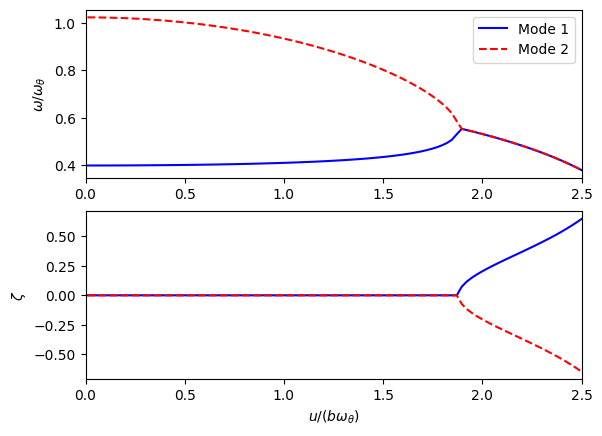

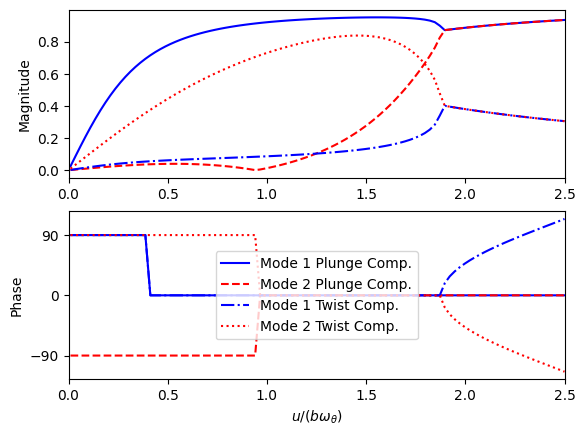

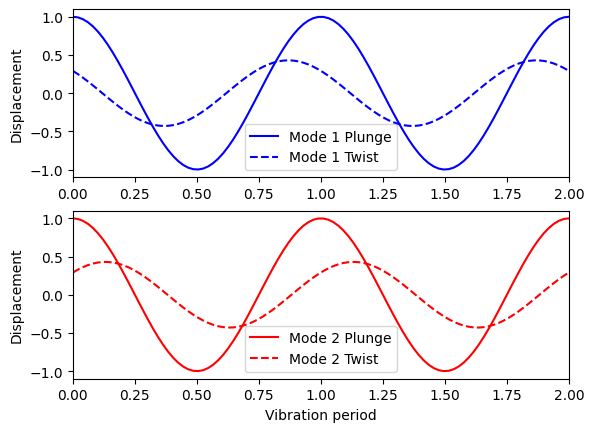

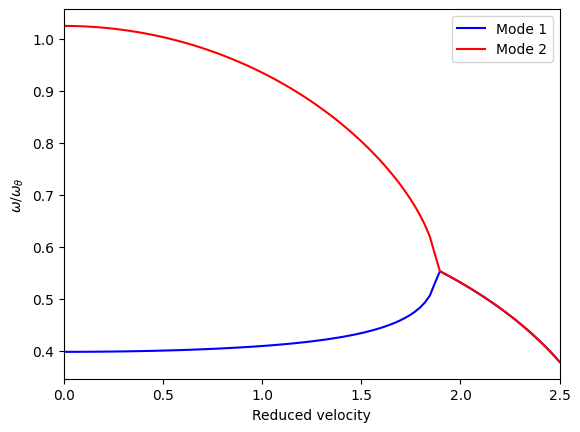

In [20]:
#Plot eigenvalues and eigenvectors against reduced velocity
plt.close('all')
 
plt.figure(1)

ax1 = plt.subplot(2 , 1 , 1)
ax1.set_ylabel(r'$\omega / \omega_\theta$')
ax1.set_xlim(0 , maxvel)
plt.plot(v_red , np.imag(new_eigpair1)/w_t , 'b' , label = 'Mode 1')
plt.plot(v_red , np.imag(new_eigpair2)/w_t , 'r--' , label = 'Mode 2')
ax1.legend()

ax2 = plt.subplot(2 , 1 , 2)
ax2.set_xlabel(r'$u/(b\omega_\theta)$')
#ax2.set_ylabel(r'$\Gamma/\omega_\theta$')
ax2.set_ylabel(r'$\zeta$')
ax2.set_xlim(0 , maxvel)
plt.plot(v_red , -np.real(new_eigpair1)/np.imag(new_eigpair1), 'b')
plt.plot(v_red , -np.real(new_eigpair2)/np.imag(new_eigpair2), 'r--')
#plt.plot(v_red , -np.real(new_eigpair1), 'b')
#plt.plot(v_red , -np.real(new_eigpair2), 'r')
plt.savefig('typ_section_eigenvalues-mu40.png')




#Eigenvectors
plt.figure(2)
ax3 = plt.subplot(2 , 1 , 1)
ax3.set_ylabel('Magnitude')
ax3.set_xlim(0 , maxvel)
ax3.plot(v_red , np.abs(new_vecpair1[: , 0]) , 'b')
ax3.plot(v_red , np.abs(new_vecpair2[: , 0]) , 'r--')
ax3.plot(v_red , np.abs(new_vecpair1[: , 1]) , 'b-.')
ax3.plot(v_red , np.abs(new_vecpair2[: , 1]) , 'r:')


ax4 = plt.subplot(2 , 1 , 2)
ax4.set_ylabel('Phase')
ax4.set_xlabel(r'$u/(b\omega_\theta)$')
ax4.set_yticks(np.arange(-90,100,step=90))
ax4.set_xlim(0 , maxvel)
ax4.plot(v_red , get_phase(new_vecpair1[: , 0]) , 'b' , label = 'Mode 1 Plunge Comp.')
ax4.plot(v_red , get_phase(new_vecpair2[: , 0]) , 'r--' , label = 'Mode 2 Plunge Comp.')
ax4.plot(v_red , get_phase(new_vecpair1[: , 1]) , 'b-.' , label = 'Mode 1 Twist Comp.')
ax4.plot(v_red , get_phase(new_vecpair2[: , 1]) , 'r:' , label = 'Mode 2 Twist Comp.')
ax4.legend(loc='center')
plt.savefig('typ_section_eigenvectors.png')


#Plot time history at reduced velocity = 2
plt.figure(3)
index=79
omega=np.imag(new_eigpair1[index])
maxtime=2*2*np.pi/omega


rel_phase=np.angle(new_vecpair1[index , 1])-np.angle(new_vecpair1[index , 0])
amp_h =1
amp_th=np.abs(new_vecpair2[index,1])/np.abs(new_vecpair2[index,0])

t=np.linspace(0, maxtime, n)
h=amp_h*np.exp(1j*omega*t)
th=amp_th*np.exp(1j*(omega*t+rel_phase))


ax0 = plt.subplot(2 , 1 , 1)
ax0.set_xlim(0 , 2)
ax0.set_ylabel('Displacement')
ax0.plot(t*omega/(2*np.pi),h,'b',label='Mode 1 Plunge')
ax0.plot(t*omega/(2*np.pi),th,'b--',label='Mode 1 Twist')
ax0.legend()

rel_phase=np.angle(new_vecpair2[index , 1])-np.angle(new_vecpair2[index , 0])
amp_h =1
amp_th=np.abs(new_vecpair2[index,1])/np.abs(new_vecpair2[index,0])

t=np.linspace(0, maxtime, n)
h=amp_h*np.exp(1j*omega*t)
th=amp_th*np.exp(1j*(omega*t+rel_phase))


ax1 = plt.subplot(2 , 1 , 2)
ax1.set_xlim(0 , 2)
ax1.set_ylabel('Displacement')
ax1.set_xlabel('Vibration period')
ax1.plot(t*omega/(2*np.pi),h,'r',label='Mode 2 Plunge')
ax1.plot(t*omega/(2*np.pi),th,'r--',label='Mode 2 Twist')
ax1.legend()


plt.savefig('displacement-time.png')

plt.figure(4)

ax1 = plt.subplot(1 , 1 , 1)
ax1.set_ylabel(r'$\omega / \omega_\theta$')
ax1.set_xlabel('Reduced velocity')
ax1.set_xlim(0 , maxvel)
plt.plot(v_red , np.imag(new_eigpair1)/w_t , 'b' , label = 'Mode 1')
plt.plot(v_red , np.imag(new_eigpair2)/w_t , 'r' , label = 'Mode 2')
ax1.legend()
plt.savefig('typ_section_eigenvalues_mu20.png')

print('reduced velocity:', v_red[index])
print('Relative phase:', rel_phase*180/np.pi)